In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
import statistics

In [2]:
# Read in the example catalog 
#catalog = pd.read_csv(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Louis_CorinthData\OtherEQCatalogs\SOULTZ_19932000Best_agreement_induced\SSFS2004-Catalogue - Copy.csv")
catalog = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Louis_CorinthData/OtherEQCatalogs/SOULTZ_19932000Best_agreement_induced/SSFS2004-Catalogue - Copy.csv')


In [3]:
# Inj Start 13/09/2004 8:10:43
# Inj End 16/09/2004 20:05:18
injSt = datetime(2004,9,13,8,10,43).timestamp()/86400
injEnd = datetime(2004,9,16,20,5,18).timestamp()/86400 - injSt
print(injEnd)

3.496238425925185


In [4]:
DT =[]
dt=[]
for i in range(len(catalog["Date"])):
    ds = catalog["Date"][i].split("/")
    ts = catalog["Time"][i].split(":")
    DT.append(datetime(int(ds[2]),int(ds[1]),int(ds[0]),int(ts[0]),int(ts[1]),int(ts[2])))
    dt.append(datetime(int(ds[2]),int(ds[1]),int(ds[0]),int(ts[0]),int(ts[1]),int(ts[2])).timestamp()/86400.0-injSt)
print(len(DT))
#print(dt)

5861


In [5]:



# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['ML'], catalog['East (m)'], catalog['North(m)'], catalog['Depth (m)'])
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(dt))

5016 5861


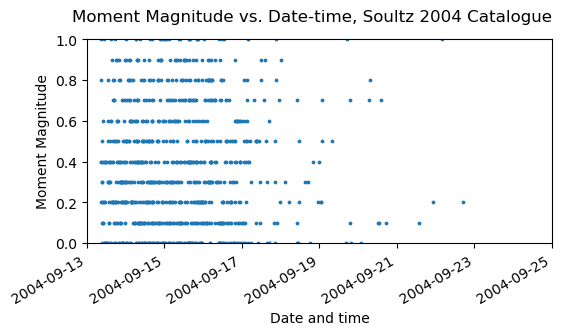

In [6]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(DT,catalog["ML"],s=3)
figure.suptitle("Moment Magnitude vs. Date-time, Soultz 2004 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
ax1.set_ylim(0,1)
figure.autofmt_xdate()
plt.show()

In [7]:
# Drif Corrections

#%% correction  mag for Soultz 2004 and 2005
#M0 = 10.^(0.77*mag0+9.16);
#mag0=(2/3)*log10(M0)-6.1;

M0 = np.power(10,0.77*np.array(magF)+9.16)
MNew = 2/3.0*np.log10(M0)-6.1

In [8]:
# Calculate b-value for the 'M.magnit' column 
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(MNew, bins, delta_b = 0.1)
histp, bp = b_value_functions.bpos(MNew)
bv = b
print(bv,bp)

0.9501874129389561 1.1598742565377196


In [9]:
# Calculate a fit line for plotting

x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

Text(0.5, 1.0, 'SSFS 2004 MFD')

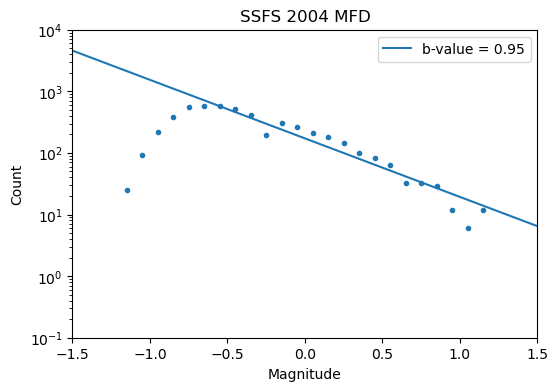

In [10]:
# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 2004 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS2004 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ] 340


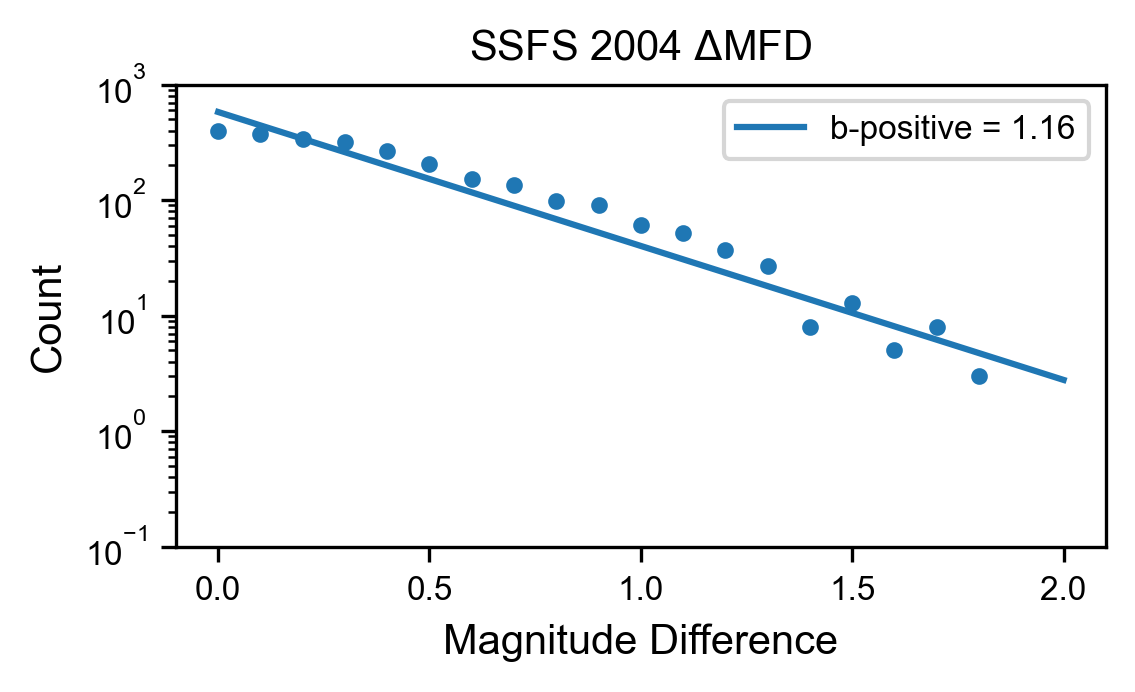

In [38]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(MNew)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**3])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 2004 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS2004 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

In [11]:
print(Mc)

-0.39999999999999875


NameError: name 'svd' is not defined

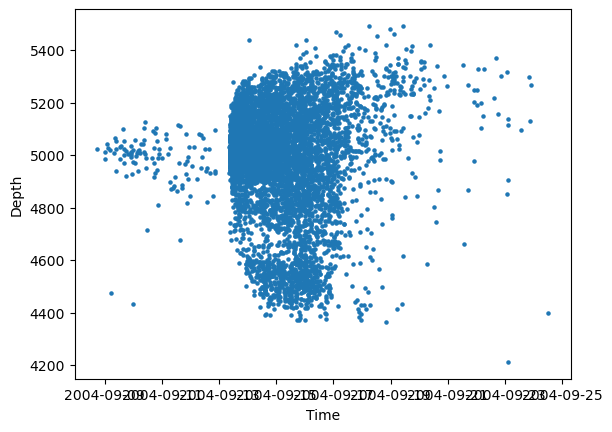

In [12]:
plt.scatter(DT,catalog["Depth (m)"],s=5)
plt.xlabel("Time")
plt.ylabel("Depth")
plt.vlines(svd,4200,5400,color='k')
plt.xlim([datetime(2004,9,12),datetime(2004,9,14)])
plt.show()

In [12]:
print(len(catalog["Depth (m)"]))

5861


In [13]:
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

228.0 -1612.0 5021.0


In [14]:
# 108
print(DT[108])
svd = DT[108]

2004-09-13 08:44:28


In [15]:
xref2 = statistics.median(catalog["East (m)"][108:118])
yref2 = statistics.median(catalog["North(m)"][108:118])
zref2 = statistics.median(catalog["Depth (m)"][108:118])
print(xref2,yref2,zref2)

228.0 -1612.0 5021.0


In [16]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

NameError: name 'dist2' is not defined

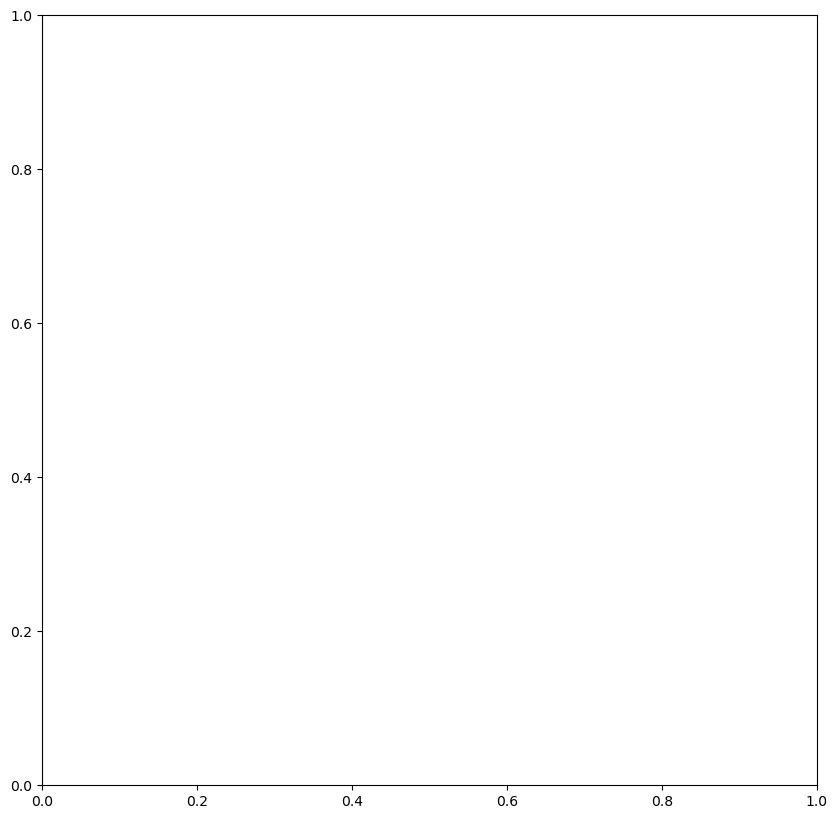

In [18]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(DT[108:],dist2,s=3,color='k')
ax1.set_xlabel("Time")
ax1.set_ylabel("distance")
ax1.set_ylim([0,800])
plt.show()

In [19]:
dist1 = np.sqrt((catalog["East (m)"]-xref2)**2+(catalog["North(m)"]-yref2)**2+(catalog["Depth (m)"]-zref2)**2)

NameError: name 'dist1' is not defined

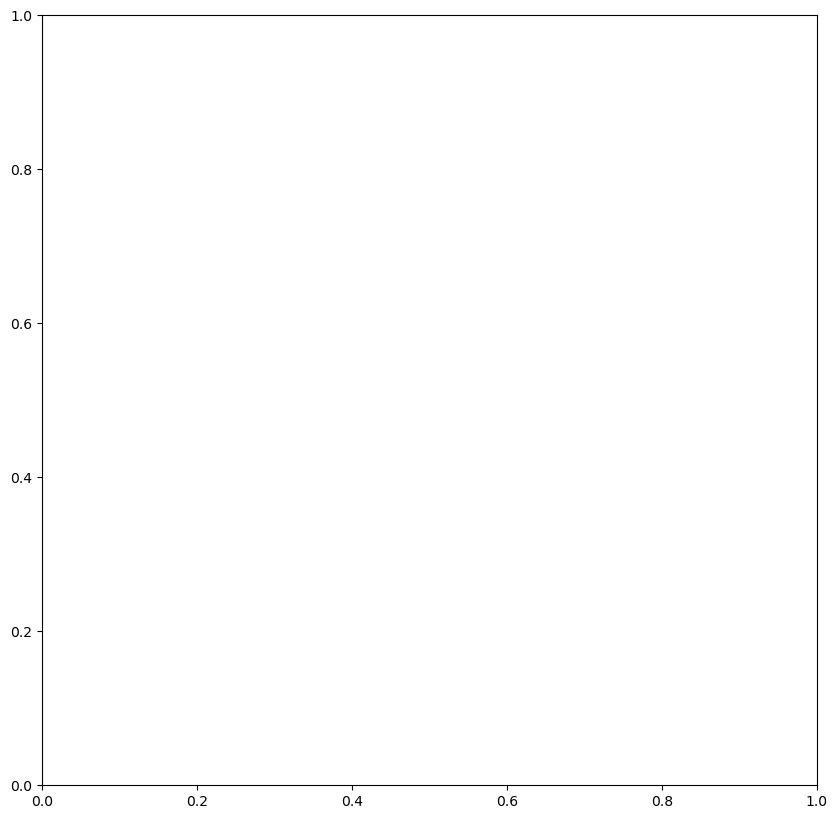

In [17]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(DT,dist1,s=3,color='k')
ax1.set_xlabel("Time")
ax1.set_ylabel("distance")
ax1.set_ylim([0,800])
plt.show()

In [18]:
# create referential list to sort dist
dstc = dist.copy()
dstRef=[]
for i in range(len(dstc)):
    dstRef.append(i)

In [19]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [20]:
quicksort_with_swaps(dstc,dstRef , 0, len(dstc) - 1)

In [21]:
print(len(catalog["ML"]))

5861


In [22]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

# Example usage:
my_array = [3, 6, 8, 10, 1, 2, 1]
sorted_array = quicksort(my_array)
print(sorted_array)

[1, 1, 2, 3, 6, 8, 10]


In [17]:
 import math


def round_decimals_down(number:float, decimals:int=2):
    """
    Returns a value rounded down to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.floor(number)

    factor = 10 ** decimals
    return math.floor(number * factor) / factor

def round_decimals_up(number:float, decimals:int=2):
    """
    Returns a value rounded up to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.ceil(number)

    factor = 10 ** decimals
    return math.ceil(number * factor) / factor

In [23]:
# create 2d array to arrange shells of references based on distance
rDivs2=[[] for i in range(2)]
rDmaxRad2=[]
count=0
rpl=0
for i in range(len(dstc)):
    if count <2508:
        rDivs2[rpl].append(dstRef[i])
        count +=1
    if count ==2508:
        count = 0
        rpl+=1
        rDmaxRad2.append(dstc[i])

In [24]:
# sort the reference array of each shell, making it so each shell is now ordered by date
sDivs2=[[] for i in range(2)]
for i in range(2):
    sDivs2[i]=quicksort(rDivs2[i])

In [25]:
rDmaxRad2.append(dstc[len(dstc)-1])
print(rDmaxRad2)

[np.float64(210.2974084481309), np.float64(706.0601957340465), np.float64(706.0601957340465)]


In [26]:
br2=[[] for i in range(2)]
bpr2=[[] for i in range(2)]
dtr2=[[] for i in range(2)]
lbr2=[[] for i in range(2)]
hbr2=[[] for i in range(2)]
stdr2=[[] for i in range(2)]
lbpr2=[[] for i in range(2)]
hbpr2=[[] for i in range(2)]
stdpr2=[[] for i in range(2)]
mxmr2=[[] for i in range(2)]
mxdr2=[[] for i in range(2)]

for i in range(2):
    print(i)
    
    for x in range(300,len(sDivs2[i]),30):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(MNew[sDivs2[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs2[i][j]]
        mxT=np.array(mxt)
        mxmr2[i].append(mxm)
        mxdr2[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.1)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.1)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.1)
        br2[i].append(b)
        dtr2[i].append(dtF[sDivs2[i][x]])
        bpr2[i].append(bP)
        lbr2[i].append(low_b)
        lbpr2[i].append(low_bp)
        hbr2[i].append(high_b)
        hbpr2[i].append(high_bp)
        stdr2[i].append(std)
        stdpr2[i].append(stdp)
        

0
1


0


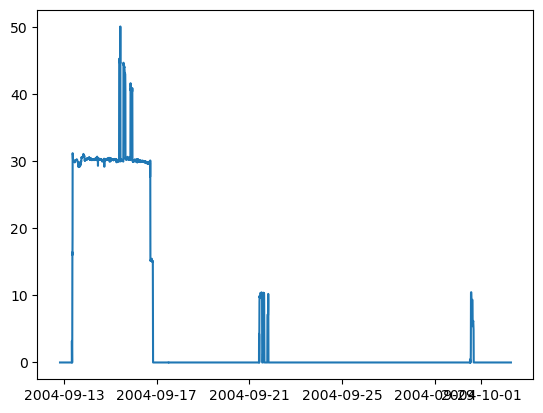

In [30]:
#Hydraulics
hydra = pd.read_csv(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Documents\SSFS2004Hyd.csv")

hyDT =[]
for i in range(len(hydra['Date'])):
    ds = hydra["Date"][i].split("/")
    ts = hydra["Time"][i].split(":")
    hyDT.append(datetime(int(ds[2]),int(ds[1]),int(ds[0]),int(ts[0]),int(ts[1]),int(ts[2])))    

#hyDTN = [(dt-DT[0]).total_seconds()/86400.0 for dt in hyDT]

plt.plot(hyDT,hydra['Qin_Omega'])
#plt.xlim(7.5,10)

flg=True
injEndT=0
#for i in range(len(hydra['Qin_Omega'])):
    #if hyDTN[i] > 8.0 and hydra['Qin_Omega'][i]<2.0 and flg:
        #injEndT=hyDTN[i]
        #flg=False
print(injEndT)

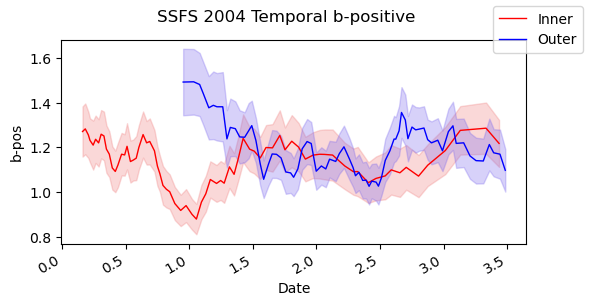

In [27]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("SSFS 2004 Temporal b-positive")
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([,12])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

In [54]:
stDat= DT[0]
dtr20New = [(dt-stDat).total_seconds()/86400.0 for dt in dtr2[0]]
dtr21New = [(dt-stDat).total_seconds()/86400.0 for dt in dtr2[1]]

TypeError: unsupported operand type(s) for -: 'float' and 'datetime.datetime'

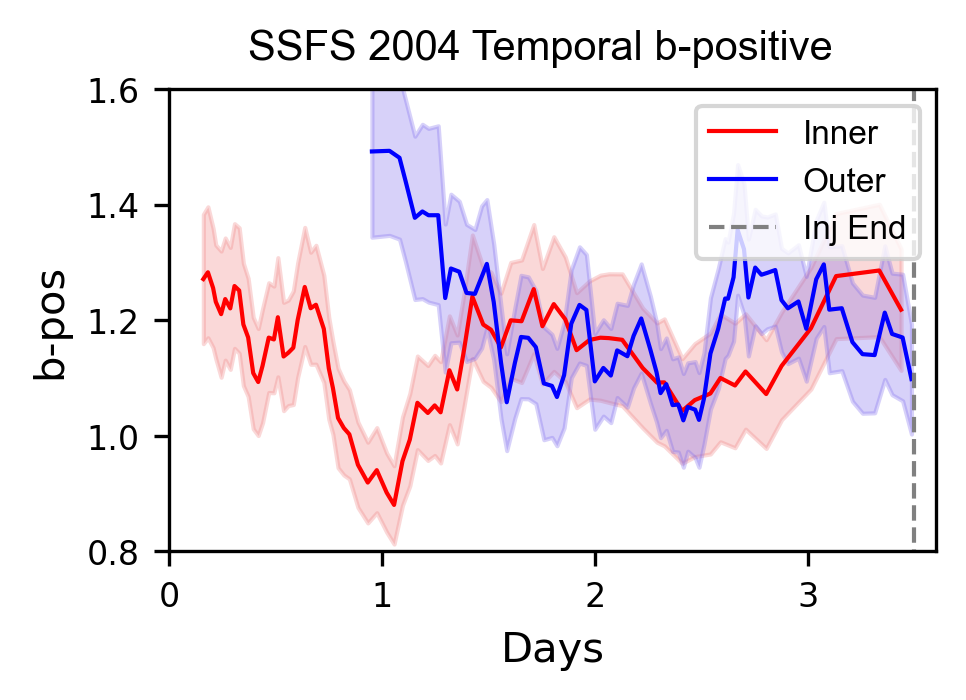

In [28]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("SSFS 2004 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',linewidth=1,label='Inj End')
ax1.set_xlim([0,3.6])
ax1.set_ylim([0.8,1.6])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\ssfs2004.png",bbox_inches='tight', pad_inches=0.05)

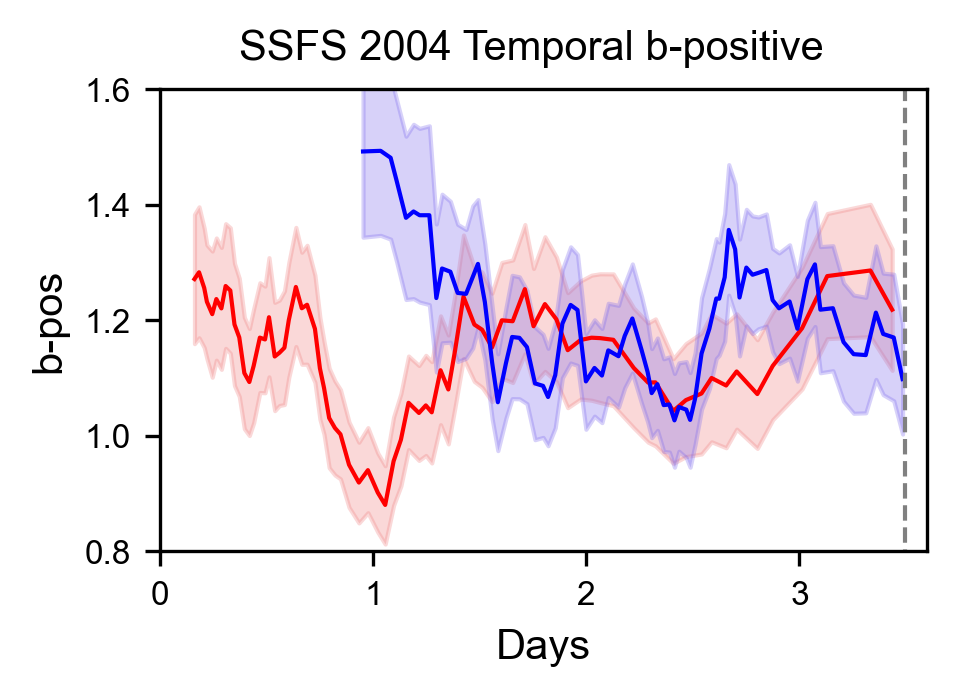

In [29]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("SSFS 2004 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',linewidth=1,label='Inj End')
ax1.set_xlim([0,3.6])
ax1.set_ylim([0.8,1.6])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)
#fig.autofmt_xdate()
#plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\ssfs2004 sansLgnd.png",bbox_inches='tight', pad_inches=0.05)

In [30]:
# find max eq in both inner and outer shells
ioMax =[-10,-10]
for i in range(len(sDivs2[0])):
    if MNew[sDivs2[0][i]]>ioMax[0]:
        ioMax[0]=MNew[sDivs2[0][i]]
for i in range(len(sDivs2[1])):
    if MNew[sDivs2[1][i]]>ioMax[1]:
        ioMax[1]=MNew[sDivs2[1][i]]

print(ioMax)

[np.float64(1.187333333333334), np.float64(1.187333333333334)]


In [31]:
print(rDmaxRad2[0]/rDmaxRad2[1])

0.29784628806258917


[]

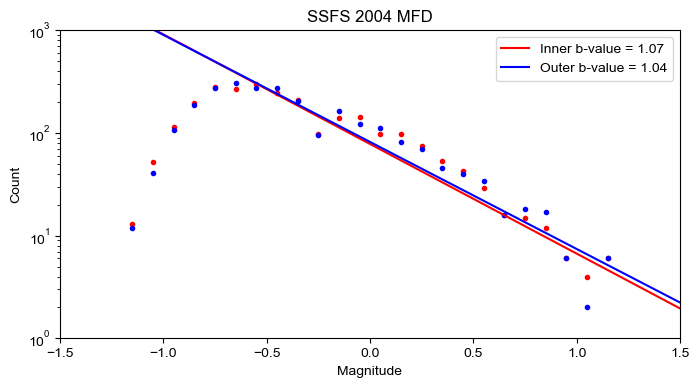

In [32]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MNew[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MNew[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.00001)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.00001)

x = bins
y_Mci = histi[0][np.argmax(histi[0])+2]
ai = np.log10(y_Mci) + bi*Mci

best_fiti = 10**(ai-bi*x)

x = bins
y_Mco = histo[0][np.argmax(histo[0])+2]
ao = np.log10(y_Mco) + bo*Mco
best_fito = 10**(ao-bo*x)

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [8,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, histi[0], marker = '.',color='r')
ax1.plot(x, best_fiti, label = 'Inner b-value = '+str(np.round(bi,2)),color='r')

ax1.scatter(mid_bins, histo[0], marker = '.',color='b')
ax1.plot(x, best_fito, label = 'Outer b-value = '+str(np.round(bo,2)),color='b')

ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**0, 10**3])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS 2004 MFD')
plt.plot()

1.1336885614417773 1.2061707213216641


[]

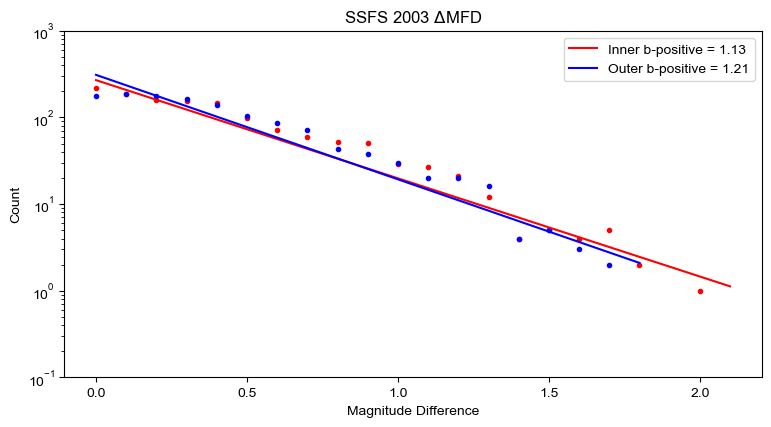

In [36]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MNew[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MNew[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)



#x = hist1[1] yint = hist1[0][2] print(x,yint) best_fit = 10**(np.log10(yint)-bP*(x-0.2)) 

xi = histi1[1]
y_Mci = histi1[0][2]
best_fiti = 10**(np.log10(y_Mci)-bPi*(xi-0.2))

xo = histo1[1]
y_Mco = histo1[0][2]
best_fito = 10**(np.log10(y_Mco)-bPo*(xo-0.2))

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 


# Plot results 
figure = plt.figure(figsize = [9,4.5])
ax1 = figure.add_subplot(111)

ax1.scatter(np.copy(histi1[1])[:-1], histi1[0], marker = '.',color='r')
ax1.plot(xi, best_fiti, label = 'Inner b-positive = '+str(np.round(bPi,2)),color='r')

ax1.scatter(np.copy(histo1[1])[:-1], histo1[0], marker = '.',color='b')
ax1.plot(xo, best_fito, label = 'Outer b-positive = '+str(np.round(bPo,2)),color='b')

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**3])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude Difference')
ax1.set_ylabel('Count')
ax1.set_title('SSFS 2003 $\Delta$MFD')
plt.plot()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ] 340


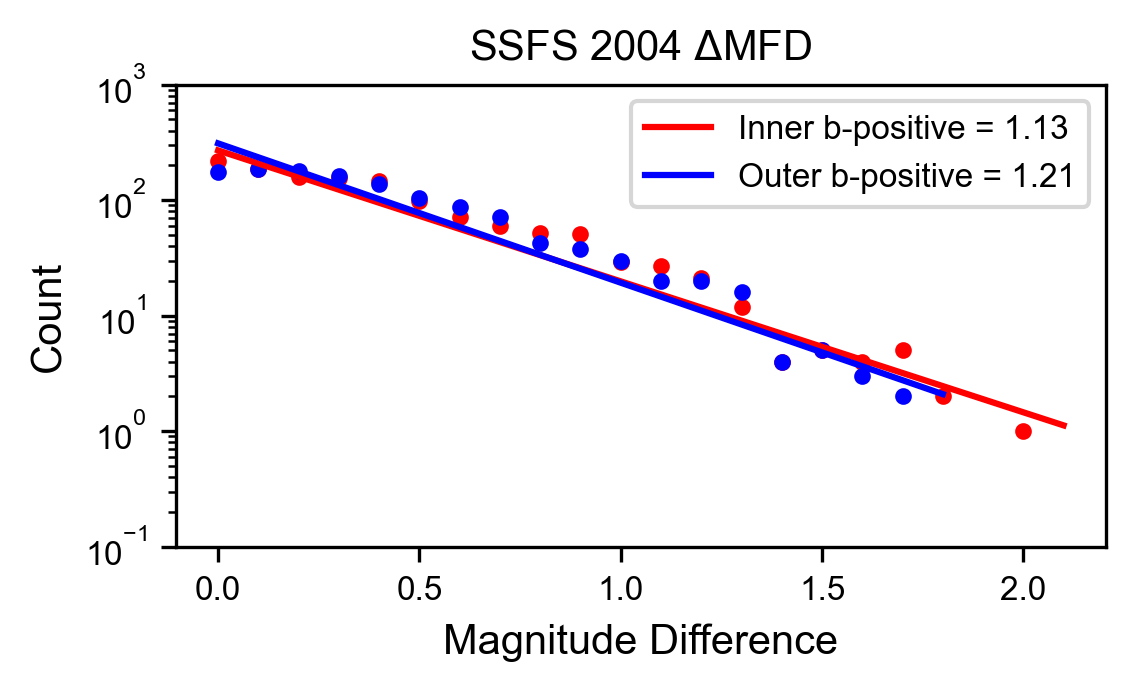

In [37]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(MNew)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'

ax1.scatter(np.copy(histi1[1])[:-1], histi1[0], marker = '.',color='r')
ax1.plot(xi, best_fiti, label = 'Inner b-positive = '+str(np.round(bPi,2)),color='r')

ax1.scatter(np.copy(histo1[1])[:-1], histo1[0], marker = '.',color='b')
ax1.plot(xo, best_fito, label = 'Outer b-positive = '+str(np.round(bPo,2)),color='b')

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**3])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 2004 $\Delta$MFD',fontsize=10)
plt.plot()
fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS2004 IO DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

In [83]:
mmdi=[]
mmmi=[]
for x in range(len(sDivs2[0])):
    mmdi.append(DT[sDivs2[0][x]])
    mmmi.append(catalog["ML"][sDivs2[0][x]])
    
mmdo=[]
mmmo=[]
for x in range(len(sDivs2[1])):
    mmdo.append(DT[sDivs2[1][x]])
    mmmo.append(catalog["ML"][sDivs2[1][x]])

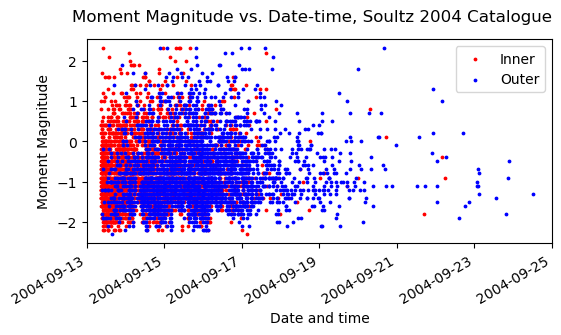

In [87]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(mmdi,mmmi,s=3,color='r',label='Inner')
ax1.scatter(mmdo,mmmo,s=3,color='b',label='Outer')
figure.suptitle("Moment Magnitude vs. Date-time, Soultz 2004 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
ax1.legend(loc = 'upper right')
figure.autofmt_xdate()
plt.show()